In [1]:
from tensorflow.keras.models import load_model

model = load_model("unet_1_augmented_fine2.h5", compile=False)

In [2]:
#gf 5.1
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


IMG_SIZE = 256
NUM_CLASSES = 3

original_img_path = r'C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\input_images\23GFNI5.1.jpg'
mask_path = r'C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\input_images\ground51.tif' 


out_img_dir = 'dataset51/images/'
out_mask_dir = 'dataset51/masks/'


img = cv2.imread(original_img_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)


os.makedirs(out_img_dir, exist_ok=True)
os.makedirs(out_mask_dir, exist_ok=True)


def load_data(image_dir, mask_dir):
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
    mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith('.png')])

    X = []
    Y = []

    for img_name, mask_name in zip(image_files, mask_files):
        
        img = cv2.imread(os.path.join(image_dir, img_name))
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img / 255.0)  

       
        mask = cv2.imread(os.path.join(mask_dir, mask_name), 0)
        mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST)

        
        
        class_0 = (mask < 64)             # black → class 0
        class_1 = (mask >= 64) & (mask < 192)  # gray → class 1
        class_2 = (mask >= 192)           # white → class 2

        class_mask = np.zeros_like(mask, dtype=np.uint8)
        class_mask[class_1] = 1
        class_mask[class_2] = 2

    
        Y.append(to_categorical(class_mask, num_classes=NUM_CLASSES))

    return np.array(X, dtype=np.float32), np.array(Y, dtype=np.uint8)


X, Y = load_data('dataset51/images/', 'dataset51/masks/')
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Dataset:")
print("X:", X.shape)
print("Y:", Y.shape)

Dataset:
X: (88, 256, 256, 3)
Y: (88, 256, 256, 3)


In [3]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [4]:

pred_probs = model.predict(X_val)


pred_classes = np.argmax(pred_probs, axis=-1)
true_classes = np.argmax(Y_val, axis=-1)

1/1 [==============================] - 1s 843ms/step


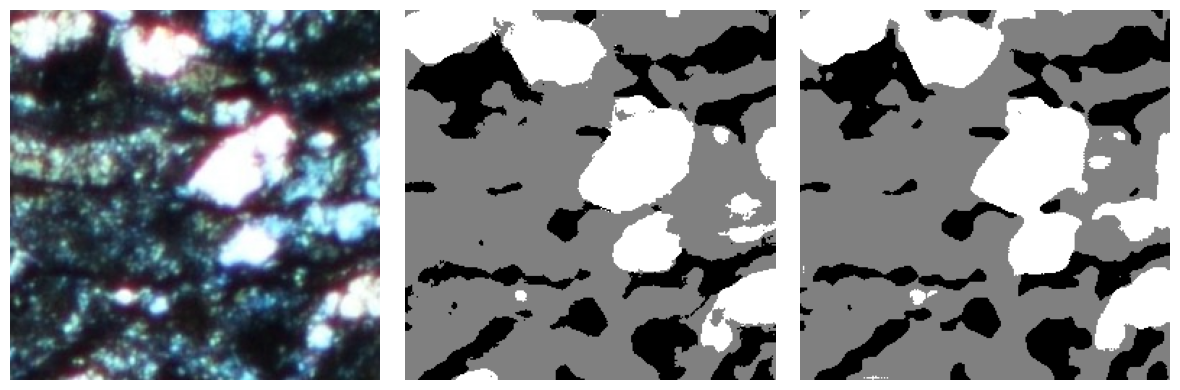

In [5]:
import matplotlib.pyplot as plt

i = 0  

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(X_val[i])
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(true_classes[i], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(pred_classes[i], cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
from sklearn.metrics import classification_report, confusion_matrix, jaccard_score


y_true_flat = true_classes.flatten()
y_pred_flat = pred_classes.flatten()

print("Classification Report:")
print(classification_report(y_true_flat, y_pred_flat, target_names=["Matrix", "Clasts", "Lithics"]))


print("IoU per class:")
print(jaccard_score(y_true_flat, y_pred_flat, average=None))

Classification Report:
              precision    recall  f1-score   support

      Matrix       0.94      0.92      0.93    285387
      Clasts       0.96      0.96      0.96    766069
     Lithics       0.88      0.93      0.91    128192

    accuracy                           0.95   1179648
   macro avg       0.93      0.94      0.93   1179648
weighted avg       0.95      0.95      0.95   1179648

IoU per class:
[0.87213137 0.92252007 0.83058699]


In [7]:
#23mar01.1
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


IMG_SIZE = 256
NUM_CLASSES = 3

original_img_path = r'C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\input_images\01.1.jpg'
mask_path = r'C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\input_images\ground_truth11.tif' 


out_img_dir = 'dataset11/images/'
out_mask_dir = 'dataset11/masks/'



img = cv2.imread(original_img_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)


os.makedirs(out_img_dir, exist_ok=True)
os.makedirs(out_mask_dir, exist_ok=True)


def load_data(image_dir, mask_dir):
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
    mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith('.png')])

    X = []
    Y = []

    for img_name, mask_name in zip(image_files, mask_files):
       
        img = cv2.imread(os.path.join(image_dir, img_name))
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img / 255.0)  

       
        mask = cv2.imread(os.path.join(mask_dir, mask_name), 0)
        mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST)

       
        class_0 = (mask < 64)             # black → class 0
        class_1 = (mask >= 64) & (mask < 192)  # gray → class 1
        class_2 = (mask >= 192)           # white → class 2

        class_mask = np.zeros_like(mask, dtype=np.uint8)
        class_mask[class_1] = 1
        class_mask[class_2] = 2

        
        Y.append(to_categorical(class_mask, num_classes=NUM_CLASSES))

    return np.array(X, dtype=np.float32), np.array(Y, dtype=np.uint8)

X, Y = load_data('dataset11/images/', 'dataset11/masks/')
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Data ready:")
print("X:", X.shape)
print("Y:", Y.shape)

Data ready:
X: (35, 256, 256, 3)
Y: (35, 256, 256, 3)


1/1 [==============================] - 0s 362ms/step


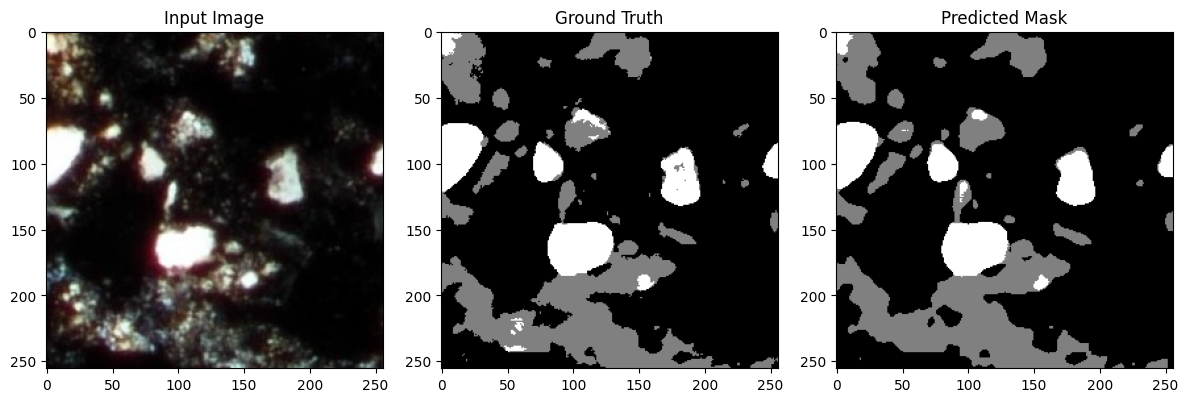

Classification Report:
              precision    recall  f1-score   support

      Matrix       0.99      0.99      0.99    353173
      Clasts       0.93      0.93      0.93     81981
     Lithics       0.93      0.94      0.93     23598

    accuracy                           0.97    458752
   macro avg       0.95      0.95      0.95    458752
weighted avg       0.97      0.97      0.97    458752

IoU per class:
[0.97433811 0.86590679 0.8749505 ]


In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


pred_probs = model.predict(X_val)


pred_classes = np.argmax(pred_probs, axis=-1)
true_classes = np.argmax(Y_val, axis=-1)

import matplotlib.pyplot as plt

i = 0 

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(X_val[i])
plt.title("Input Image")

plt.subplot(1, 3, 2)
plt.imshow(true_classes[i], cmap='gray')
plt.title("Ground Truth")

plt.subplot(1, 3, 3)
plt.imshow(pred_classes[i], cmap='gray')
plt.title("Predicted Mask")

plt.tight_layout()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, jaccard_score


y_true_flat = true_classes.flatten()
y_pred_flat = pred_classes.flatten()

print("Classification Report:")
print(classification_report(y_true_flat, y_pred_flat, target_names=["Matrix", "Clasts", "Lithics"]))


print("IoU per class:")
print(jaccard_score(y_true_flat, y_pred_flat, average=None))


In [9]:
#23mar18
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


IMG_SIZE = 256
NUM_CLASSES = 3

original_img_path = r'C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\input_images\23mar01.2.jpg'
mask_path = r'C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\input_images\ground_truth12.tif' 

out_img_dir = 'dataset12/images/'
out_mask_dir = 'dataset12/masks/'



img = cv2.imread(original_img_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)


os.makedirs(out_img_dir, exist_ok=True)
os.makedirs(out_mask_dir, exist_ok=True)


def load_data(image_dir, mask_dir):
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
    mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith('.png')])

    X = []
    Y = []

    for img_name, mask_name in zip(image_files, mask_files):
       
        img = cv2.imread(os.path.join(image_dir, img_name))
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img / 255.0) 

       
        mask = cv2.imread(os.path.join(mask_dir, mask_name), 0)
        mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST)

       
        class_0 = (mask < 64)             # black → class 0
        class_1 = (mask >= 64) & (mask < 192)  # gray → class 1
        class_2 = (mask >= 192)           # white → class 2

        class_mask = np.zeros_like(mask, dtype=np.uint8)
        class_mask[class_1] = 1
        class_mask[class_2] = 2

     
        Y.append(to_categorical(class_mask, num_classes=NUM_CLASSES))

    return np.array(X, dtype=np.float32), np.array(Y, dtype=np.uint8)


X, Y = load_data('dataset12/images/', 'dataset12/masks/')
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Data ready:")
print("X:", X.shape)
print("Y:", Y.shape)

Data ready:
X: (48, 256, 256, 3)
Y: (48, 256, 256, 3)


1/1 [==============================] - 1s 602ms/step


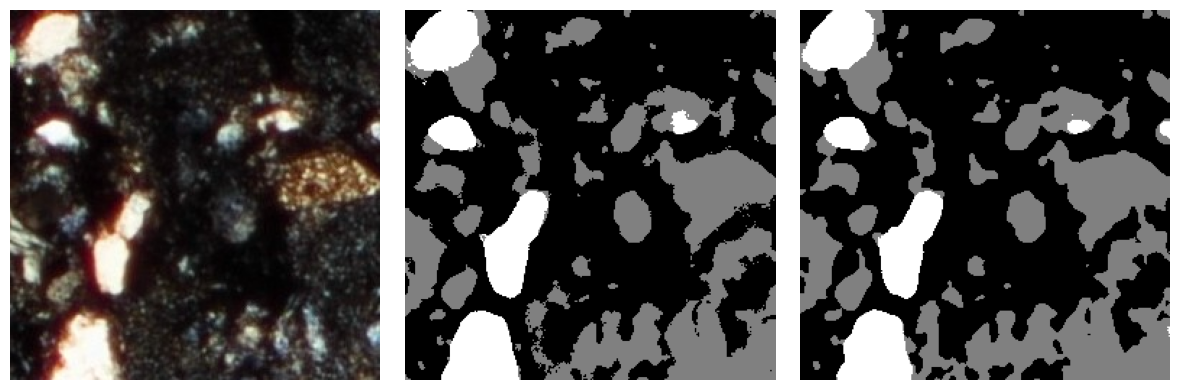

Classification Report:
              precision    recall  f1-score   support

      Matrix       0.97      0.96      0.97    360064
      Clasts       0.93      0.95      0.94    224869
     Lithics       0.96      0.94      0.95     70427

    accuracy                           0.96    655360
   macro avg       0.95      0.95      0.95    655360
weighted avg       0.96      0.96      0.96    655360

IoU per class:
[0.9398701  0.88195172 0.90201666]


In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


pred_probs = model.predict(X_val)

pred_classes = np.argmax(pred_probs, axis=-1)
true_classes = np.argmax(Y_val, axis=-1)
import matplotlib.pyplot as plt

i = 0  

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(X_val[i])
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(true_classes[i], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(pred_classes[i], cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, jaccard_score


y_true_flat = true_classes.flatten()
y_pred_flat = pred_classes.flatten()

print("Classification Report:")
print(classification_report(y_true_flat, y_pred_flat, target_names=["Matrix", "Clasts", "Lithics"]))


print("IoU per class:")
print(jaccard_score(y_true_flat, y_pred_flat, average=None))

Data ready:
X: (54, 256, 256, 3)
Y: (54, 256, 256, 3)
1/1 [==============================] - 0s 405ms/step


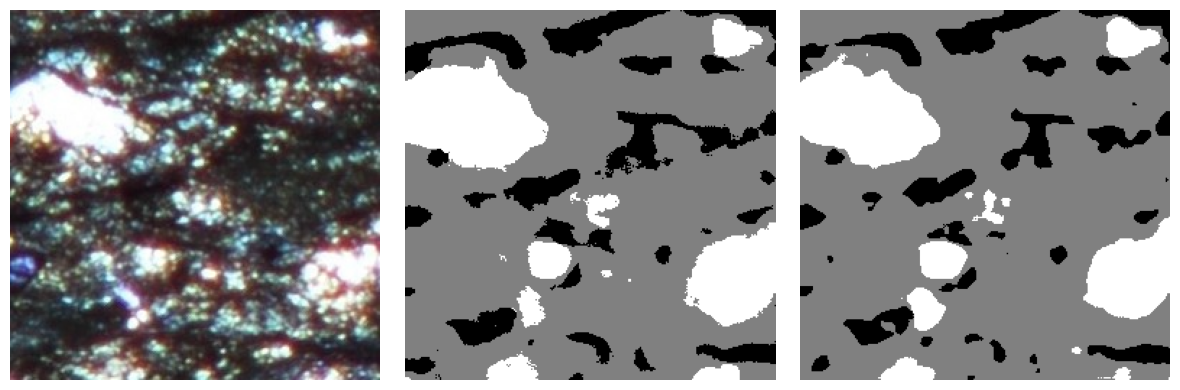

Classification Report:
              precision    recall  f1-score   support

      Matrix       0.94      0.80      0.86     99157
      Clasts       0.91      0.97      0.94    443430
     Lithics       0.95      0.87      0.91    178309

    accuracy                           0.92    720896
   macro avg       0.93      0.88      0.90    720896
weighted avg       0.92      0.92      0.92    720896

IoU per class:
[0.75827872 0.88347351 0.82800103]


In [11]:
#gf 5.1
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


IMG_SIZE = 256
NUM_CLASSES = 3

original_img_path = r'C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\input_images\23GFAY21XleftYup IMG.jpg'
mask_path = r'C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\input_images\ground_truth21.tif' 


out_img_dir = 'dataset21/images/'
out_mask_dir = 'dataset21/masks/'


img = cv2.imread(original_img_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)


os.makedirs(out_img_dir, exist_ok=True)
os.makedirs(out_mask_dir, exist_ok=True)


def load_data(image_dir, mask_dir):
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
    mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith('.png')])

    X = []
    Y = []

    for img_name, mask_name in zip(image_files, mask_files):
       
        img = cv2.imread(os.path.join(image_dir, img_name))
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img / 255.0) 

       
        mask = cv2.imread(os.path.join(mask_dir, mask_name), 0)
        mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST)

        class_0 = (mask < 64)             # black → class 0
        class_1 = (mask >= 64) & (mask < 192)  # gray → class 1
        class_2 = (mask >= 192)           # white → class 2

        class_mask = np.zeros_like(mask, dtype=np.uint8)
        class_mask[class_1] = 1
        class_mask[class_2] = 2

       
        Y.append(to_categorical(class_mask, num_classes=NUM_CLASSES))

    return np.array(X, dtype=np.float32), np.array(Y, dtype=np.uint8)


X, Y = load_data('dataset21/images/', 'dataset21/masks/')
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Data ready:")
print("X:", X.shape)
print("Y:", Y.shape)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


pred_probs = model.predict(X_val)


pred_classes = np.argmax(pred_probs, axis=-1)
true_classes = np.argmax(Y_val, axis=-1)
import matplotlib.pyplot as plt

i = 0 

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(X_val[i])
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(true_classes[i], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(pred_classes[i], cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, jaccard_score


y_true_flat = true_classes.flatten()
y_pred_flat = pred_classes.flatten()

print("Classification Report:")
print(classification_report(y_true_flat, y_pred_flat, target_names=["Matrix", "Clasts", "Lithics"]))


print("IoU per class:")
print(jaccard_score(y_true_flat, y_pred_flat, average=None))

Data ready:
X: (48, 256, 256, 3)
Y: (48, 256, 256, 3)
1/1 [==============================] - 0s 402ms/step


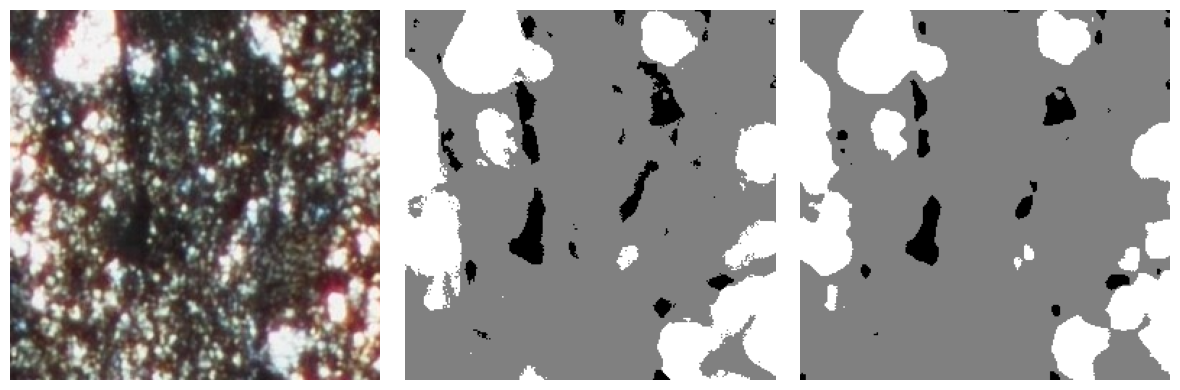

Classification Report:
              precision    recall  f1-score   support

      Matrix       0.93      0.78      0.85     79240
      Clasts       0.94      0.99      0.96    498842
     Lithics       0.96      0.84      0.90     77278

    accuracy                           0.94    655360
   macro avg       0.94      0.87      0.90    655360
weighted avg       0.94      0.94      0.94    655360

IoU per class:
[0.73458317 0.93037099 0.81519364]


In [12]:
#gf 5.1
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


IMG_SIZE = 256
NUM_CLASSES = 3

original_img_path = r'C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\input_images\23GFNI1.1yleftzup IMG.jpg'
mask_path = r'C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\input_images\ground_truthgf11.tif' 


out_img_dir = 'datasetgf11/images/'
out_mask_dir = 'datasetgf11/masks/'



img = cv2.imread(original_img_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)


os.makedirs(out_img_dir, exist_ok=True)
os.makedirs(out_mask_dir, exist_ok=True)


def load_data(image_dir, mask_dir):
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
    mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith('.png')])

    X = []
    Y = []

    for img_name, mask_name in zip(image_files, mask_files):
        
        img = cv2.imread(os.path.join(image_dir, img_name))
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img / 255.0) 

       
        mask = cv2.imread(os.path.join(mask_dir, mask_name), 0)
        mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST)

       
        class_0 = (mask < 64)             # black → class 0
        class_1 = (mask >= 64) & (mask < 192)  # gray → class 1
        class_2 = (mask >= 192)           # white → class 2

        class_mask = np.zeros_like(mask, dtype=np.uint8)
        class_mask[class_1] = 1
        class_mask[class_2] = 2

        
        Y.append(to_categorical(class_mask, num_classes=NUM_CLASSES))

    return np.array(X, dtype=np.float32), np.array(Y, dtype=np.uint8)

X, Y = load_data('datasetgf11/images/', 'datasetgf11/masks/')
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Data ready:")
print("X:", X.shape)
print("Y:", Y.shape)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


pred_probs = model.predict(X_val)


pred_classes = np.argmax(pred_probs, axis=-1)
true_classes = np.argmax(Y_val, axis=-1)
import matplotlib.pyplot as plt

i = 0 

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(X_val[i])
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(true_classes[i], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(pred_classes[i], cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, jaccard_score


y_true_flat = true_classes.flatten()
y_pred_flat = pred_classes.flatten()

print("Classification Report:")
print(classification_report(y_true_flat, y_pred_flat, target_names=["Matrix", "Clasts", "Lithics"]))


print("IoU per class:")
print(jaccard_score(y_true_flat, y_pred_flat, average=None))

Data ready:
X: (12, 256, 256, 3)
Y: (12, 256, 256, 3)
1/1 [==============================] - 0s 231ms/step


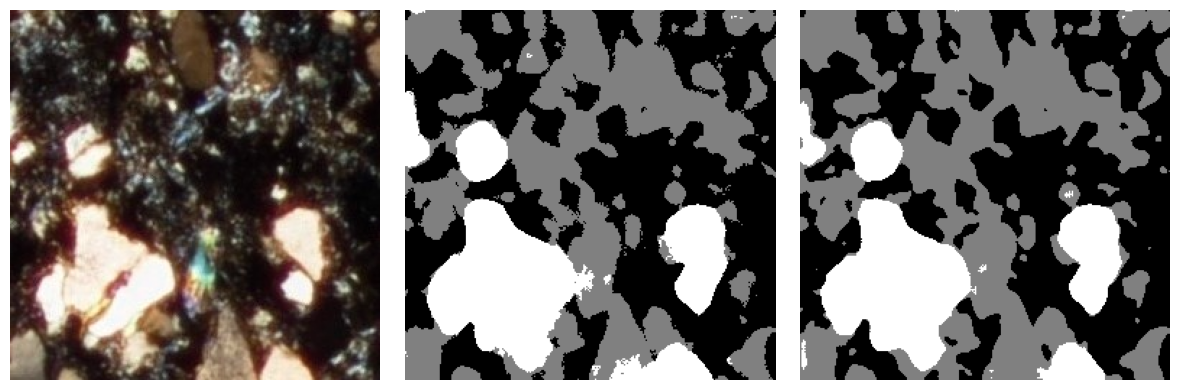

Classification Report:
              precision    recall  f1-score   support

      Matrix       0.97      0.93      0.95     81947
      Clasts       0.90      0.96      0.93     78294
     Lithics       0.96      0.91      0.94     36367

    accuracy                           0.94    196608
   macro avg       0.94      0.93      0.94    196608
weighted avg       0.94      0.94      0.94    196608

IoU per class:
[0.90591802 0.86300943 0.88451925]


In [13]:
#23mar018
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


IMG_SIZE = 256
NUM_CLASSES = 3

original_img_path = r'C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\input_images\23mar01.8.jpg'
mask_path = r'C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\input_images\ground_truth18.tif'  


out_img_dir = 'dataset18/images/'
out_mask_dir = 'dataset18/masks/'



img = cv2.imread(original_img_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)


os.makedirs(out_img_dir, exist_ok=True)
os.makedirs(out_mask_dir, exist_ok=True)


def load_data(image_dir, mask_dir):
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
    mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith('.png')])

    X = []
    Y = []

    for img_name, mask_name in zip(image_files, mask_files):
        
        img = cv2.imread(os.path.join(image_dir, img_name))
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img / 255.0) 
     
        mask = cv2.imread(os.path.join(mask_dir, mask_name), 0)
        mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST)

        
        class_0 = (mask < 64)             # black → class 0
        class_1 = (mask >= 64) & (mask < 192)  # gray → class 1
        class_2 = (mask >= 192)           # white → class 2

        class_mask = np.zeros_like(mask, dtype=np.uint8)
        class_mask[class_1] = 1
        class_mask[class_2] = 2

        
        Y.append(to_categorical(class_mask, num_classes=NUM_CLASSES))

    return np.array(X, dtype=np.float32), np.array(Y, dtype=np.uint8)


X, Y = load_data('dataset18/images/', 'dataset18/masks/')
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Data ready:")
print("X:", X.shape)
print("Y:", Y.shape)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


pred_probs = model.predict(X_val)


pred_classes = np.argmax(pred_probs, axis=-1)
true_classes = np.argmax(Y_val, axis=-1)
import matplotlib.pyplot as plt

i = 0 

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(X_val[i])
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(true_classes[i], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(pred_classes[i], cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, jaccard_score


y_true_flat = true_classes.flatten()
y_pred_flat = pred_classes.flatten()

print("Classification Report:")
print(classification_report(y_true_flat, y_pred_flat, target_names=["Matrix", "Clasts", "Lithics"]))


print("IoU per class:")
print(jaccard_score(y_true_flat, y_pred_flat, average=None))

Data ready:
X: (88, 256, 256, 3)
Y: (88, 256, 256, 3)
1/1 [==============================] - 1s 587ms/step


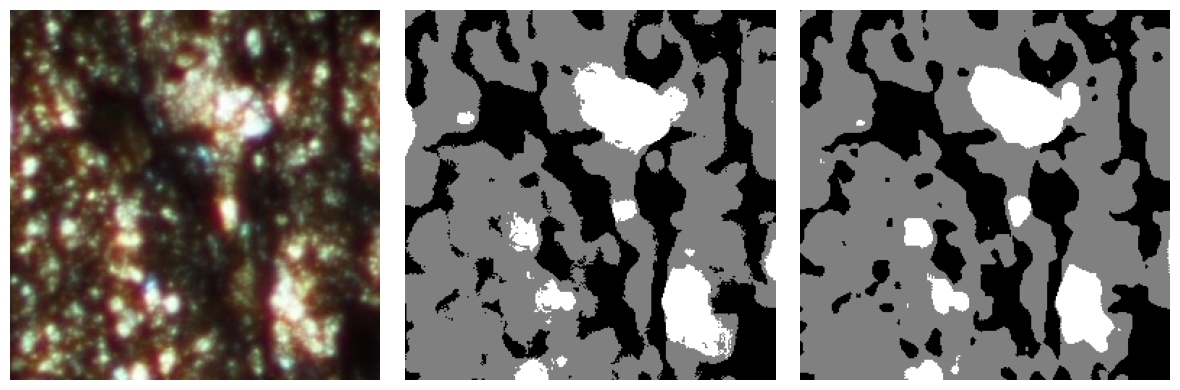

Classification Report:
              precision    recall  f1-score   support

      Matrix       0.97      0.95      0.96    564400
      Clasts       0.92      0.95      0.94    481846
     Lithics       0.94      0.91      0.93    133402

    accuracy                           0.95   1179648
   macro avg       0.94      0.94      0.94   1179648
weighted avg       0.95      0.95      0.95   1179648

IoU per class:
[0.92093994 0.87795858 0.86714535]


In [14]:
#23mar018
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


IMG_SIZE = 256
NUM_CLASSES = 3

original_img_path = r'C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\input_images\gf12.jpg'
mask_path = r'C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\input_images\ground_truthgf12.tif' 


out_img_dir = 'datasetgf12/images/'
out_mask_dir = 'datasetgf12/masks/'


img = cv2.imread(original_img_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)


os.makedirs(out_img_dir, exist_ok=True)
os.makedirs(out_mask_dir, exist_ok=True)


def load_data(image_dir, mask_dir):
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
    mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith('.png')])

    X = []
    Y = []

    for img_name, mask_name in zip(image_files, mask_files):
      
        img = cv2.imread(os.path.join(image_dir, img_name))
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img / 255.0) 

      
        mask = cv2.imread(os.path.join(mask_dir, mask_name), 0)
        mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST)

        
        class_0 = (mask < 64)             # black → class 0
        class_1 = (mask >= 64) & (mask < 192)  # gray → class 1
        class_2 = (mask >= 192)           # white → class 2

        class_mask = np.zeros_like(mask, dtype=np.uint8)
        class_mask[class_1] = 1
        class_mask[class_2] = 2

        
        Y.append(to_categorical(class_mask, num_classes=NUM_CLASSES))

    return np.array(X, dtype=np.float32), np.array(Y, dtype=np.uint8)


X, Y = load_data('datasetgf12/images/', 'datasetgf12/masks/')
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Data ready:")
print("X:", X.shape)
print("Y:", Y.shape)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


pred_probs = model.predict(X_val)


pred_classes = np.argmax(pred_probs, axis=-1)
true_classes = np.argmax(Y_val, axis=-1)
import matplotlib.pyplot as plt

i = 0  

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(X_val[i])
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(true_classes[i], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(pred_classes[i], cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, jaccard_score


y_true_flat = true_classes.flatten()
y_pred_flat = pred_classes.flatten()

print("Classification Report:")
print(classification_report(y_true_flat, y_pred_flat, target_names=["Matrix", "Clasts", "Lithics"]))


print("IoU per class:")
print(jaccard_score(y_true_flat, y_pred_flat, average=None))